<a href="https://colab.research.google.com/github/nvinogradskaya/lab1/blob/main/Sputnik_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

file_path = "events filters к тестовому Product Analyst Q1 2024.csv"
data = pd.read_csv(file_path)

data.head()

,event_category,event_action,event_label,total_events,unique_events
0,city_landing,price_button_submit,Tula / Показать предложения (11),8,7
1,city_landing,price_button_submit,Sochi / Показать предложения (39),12,10
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1
4,city_landing,price_button_submit,Moscow / Показать предложения (345),2,2


In [11]:
# Очистка event_label
def clean_label(label):
    if isinstance(label, str):
        return re.sub(r'\d+', '', label).strip().split('/')[0]
    return label

In [12]:
data['city'] = data['event_label'].apply(clean_label)

In [13]:
# 1. Сколько пользователей применяют фильтры?
filter_events = data[data['event_action'] != 'Page Visit']
users_using_filters = filter_events['unique_events'].sum()
print(f'Количество пользователей, использующих фильтры = {users_using_filters}')

Количество пользователей, использующих фильтры = 294969


In [15]:
# 2. В каких городах фильтрами пользуются чаще и реже?
city_usage = filter_events.groupby('city')['unique_events'].sum().sort_values(ascending=False)
print('\nТоп-5 городов с наибольшим использованием фильтров:')
print(city_usage.head(5))
print('\nТоп-5 городов с наименьшим использованием фильтров:')
print(city_usage.tail(5))


Топ-5 городов с наибольшим использованием фильтров:
city
Kaliningrad          20860
Saint Petersburg     19765
Moscow               12887
Sochi                11035
Istanbul              9541
Name: unique_events, dtype: int64

Топ-5 городов с наименьшим использованием фильтров:
city
Novokuznetsk     1
Chambery         1
Saransk          1
Innopolis        1
Surgut           1
Name: unique_events, dtype: int64


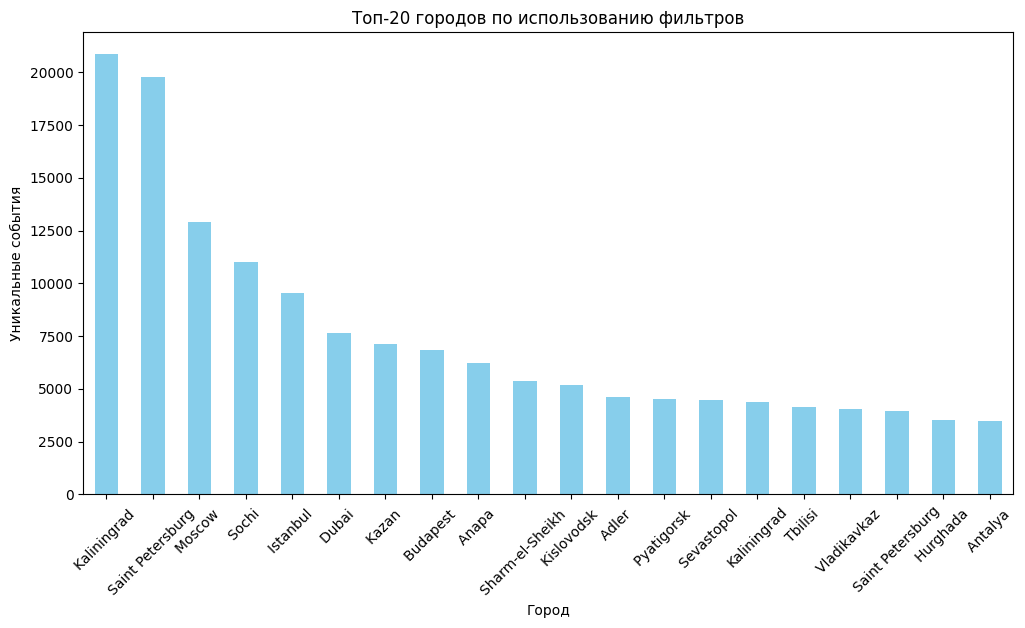

In [17]:
# Использование фильтров по городам
plt.figure(figsize=(12, 6))
city_usage.head(20).plot(kind='bar', color='skyblue')
plt.title('Топ-20 городов по использованию фильтров')
plt.xlabel('Город')
plt.ylabel('Уникальные события')
plt.xticks(rotation=45)
plt.show()

In [18]:
# 3. Какие разделы фильтров наиболее востребованы?
filter_categories = {
    'search-tools-button_open': 'Открытие панели фильтров',
    'filters-categories_click': 'Сортировка и категории',
    'price_button_submit': 'Фильтры',
    'ticket-type_checkbox': 'Фильтры',
    'start_date_click': 'Фильтры',
    'end_date_click': 'Фильтры',
    'price_button_close': 'Фильтры',
    'dates_filter_mobile': 'Фильтры',
    'price_first': 'Фильтры',
    'pay-type_checkbox': 'Фильтры',
    'clear_filter_mobile': 'Фильтры',
    'price_second': 'Фильтры',
    'price_third': 'Фильтры'
}

filter_events['category'] = filter_events['event_action'].map(filter_categories)
category_usage = filter_events.groupby('category')['unique_events'].sum().sort_values(ascending=False)
print('\nПопулярность разделов фильтров:')
print(category_usage)


Популярность разделов фильтров:
category
Фильтры                     146657
Открытие панели фильтров     85773
Сортировка и категории       62539
Name: unique_events, dtype: int64


<ipython-input-18-5ea379b6d928>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_events['category'] = filter_events['event_action'].map(filter_categories)


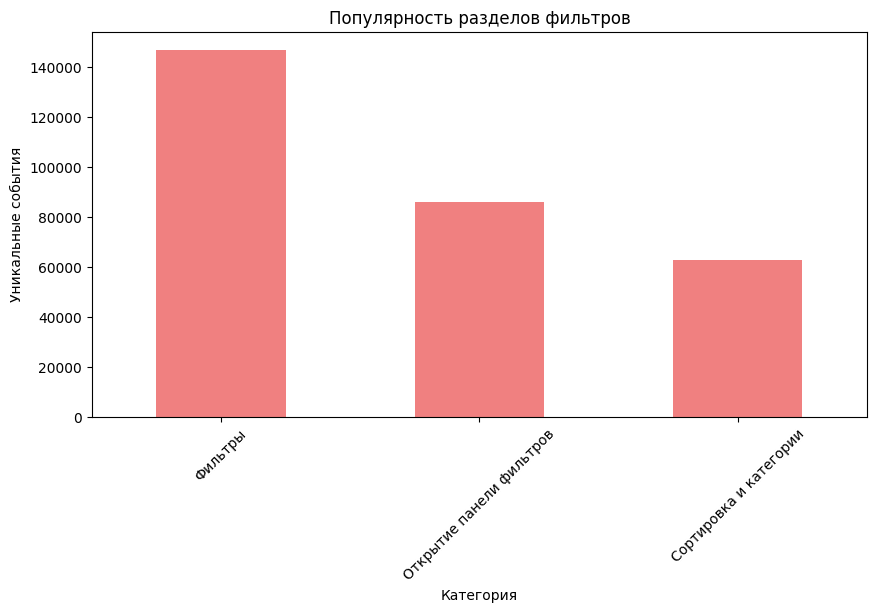

In [19]:
# Популярные разделы фильтров
plt.figure(figsize=(10, 5))
category_usage.plot(kind='bar', color='lightcoral')
plt.title('Популярность разделов фильтров')
plt.xlabel('Категория')
plt.ylabel('Уникальные события')
plt.xticks(rotation=45)
plt.show()

In [20]:
# 4. Как часто используют фильтр по цене?
price_usage = filter_events[filter_events['event_action'].str.contains('price', na=False)]['unique_events'].sum()
print(f'\nФильтр по цене использовали {price_usage} раз')


Фильтр по цене использовали 83975 раз
